### Importing all the necessary starting modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importing the Lung Cancer dataset 
data = pd.read_csv("lungcancer.csv")
data.head(5)

,Name,Surname,Age,Smokes,AreaQ,Alcohol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
#Information about the dataset:
print("\n Different Columns and their data types: \n")
print(data.info())
print("\n Statistical description about the dataset: \n")
print(data.describe())
print("\n")
print("Number of rows :" , data.shape[0])
print("Number of columns :" , data.shape[1])


 Different Columns and their data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
Name       59 non-null object
Surname    59 non-null object
Age        59 non-null int64
Smokes     59 non-null int64
AreaQ      59 non-null int64
Alcohol    59 non-null int64
Result     59 non-null int64
dtypes: int64(5), object(2)
memory usage: 2.8+ KB
None

 Statistical description about the dataset: 

             Age     Smokes      AreaQ    Alcohol     Result
count  59.000000  59.000000  59.000000  59.000000  59.000000
mean   42.627119  15.067797   5.203390   3.237288   0.474576
std    16.235230   7.984607   2.461984   2.380517   0.503640
min    18.000000   0.000000   1.000000   0.000000   0.000000
25%    29.000000  10.000000   3.000000   1.000000   0.000000
50%    39.000000  15.000000   5.000000   3.000000   0.000000
75%    55.000000  20.000000   7.500000   5.000000   1.000000
max    77.000000  34.000000  10.000000   8.000000   1.00000

#### We can notice from the dataset that it could use some treatment. The result column is already in it's binary form so we do not need to aditionally format or modify the data. However, data such as _Name_ , _Surname_, _Age_ , _Smokes_ , etc can undergo some adaptation. 

In [4]:
#Maintaing a copy of the original dataset just in case....
data_copy = data.copy()
data_copy.head(5)

,Name,Surname,Age,Smokes,AreaQ,Alcohol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


#### The _Name_ and _Surname_ do not contribute much towards the output and hence can be dropped

In [5]:
#Dropping the name and surename columns
data = data.drop(columns = {"Name" , "Surname"})
data.head(5)

,Age,Smokes,AreaQ,Alcohol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


#### Let's see if we can modify and clean the data a little more...

Let's try to categorize the numerical data like **AGE , SMOKES, AreaQ , Alcohol** into ranges

#### The Age's range from 18 to 77 in the dataset. Let us categorize _Age_ in the following ranges:

In [6]:
#Ages 18 to 30 come under 1
data.loc[(data['Age'] > 17) & (data['Age'] <= 30), 'Age'] = 1

#Ages 31 to 45 come under 2
data.loc[(data['Age'] > 30) & (data['Age'] <= 45), 'Age'] = 2

#Ages 46 to 60 come under 3
data.loc[(data['Age'] > 45) & (data['Age'] <= 60), 'Age'] = 3

#Ages 61 to 80 come under 4
data.loc[(data['Age'] > 61) & (data['Age'] <= 80), 'Age'] = 4

#### The Smoke's ranges from 0 to 34 in the dataset. Let us categorize _Smoke_ in the following ranges:

In [7]:
#Number of smokes between 0 to 10 come under 1
data.loc[(data['Smokes'] >= 0) & (data['Smokes'] <= 10), 'Smokes'] = 1

#Number of smokes between 11 to 20 come under 2
data.loc[(data['Smokes'] > 10) & (data['Smokes'] <= 20), 'Smokes'] = 2

#Number of smokes between 21 to 30 come under 3
data.loc[(data['Smokes'] > 20) & (data['Smokes'] <= 30), 'Smokes'] = 3

#Number of smokes between 31 to 40 come under 4
data.loc[(data['Smokes'] > 30) & (data['Smokes'] <= 40), 'Smokes'] = 4

data['Smokes'].value_counts()

2    34
1    17
3     7
4     1
Name: Smokes, dtype: int64

#### The AreaQ ranges from  to 10 in the dataset. Let us categorize _AreaQ_ in the following ranges:

In [8]:
#Number of AreaQ between 1 to 3 come under 1
data.loc[(data['AreaQ'] > 0) & (data['AreaQ'] <= 3), 'AreaQ'] = 1

#Number of AreaQ between 4 to 6 come under 2
data.loc[(data['AreaQ'] > 3) & (data['AreaQ'] <= 6), 'AreaQ'] = 2

#Number of AreaQ between 7 to 8 come under 3
data.loc[(data['AreaQ'] > 6) & (data['AreaQ'] <= 8), 'AreaQ'] = 3

#Number of AreaQ between 9 to 10 come under 1
data.loc[(data['AreaQ'] > 8) & (data['AreaQ'] <= 10), 'AreaQ'] = 4

data['AreaQ'].value_counts()

2    25
1    16
3    14
4     4
Name: AreaQ, dtype: int64

#### The Alcohol's ranges from 0 to 8 in the dataset. Let us categorize _Acohol_ in the following ranges:

In [9]:
#Number of Alcohol between 0 to 2 come under 1
data.loc[(data['Alcohol'] >= 0) & (data['Alcohol'] <= 2), 'Alcohol'] = 1

#Number of Alcohol between 3 to 4 come under 2
data.loc[(data['Alcohol'] > 2) & (data['Alcohol'] <= 4), 'Alcohol'] = 2

#Number of Alcohol between 5 to 6 come under 3
data.loc[(data['Alcohol'] > 4) & (data['Alcohol'] <= 6), 'Alcohol'] = 3

#Number of Alcohol between 7 to 8 come under 4
data.loc[(data['Alcohol'] > 3) & (data['Alcohol'] <= 8), 'Alcohol'] = 4

data["Alcohol"].value_counts()

1    26
2    16
3    11
4     6
Name: Alcohol, dtype: int64

#### Our data has become much cleaner than before with only categorical values:  

In [10]:
data.head(5)

,Age,Smokes,AreaQ,Alcohol,Result
0,2,1,2,2,1
1,1,2,1,3,1
2,1,1,2,1,0
3,1,1,3,1,0
4,4,1,2,3,1


#### Let's now plot the relationship between our variables using the Pearson Correlation between all the attributes in the dataset

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

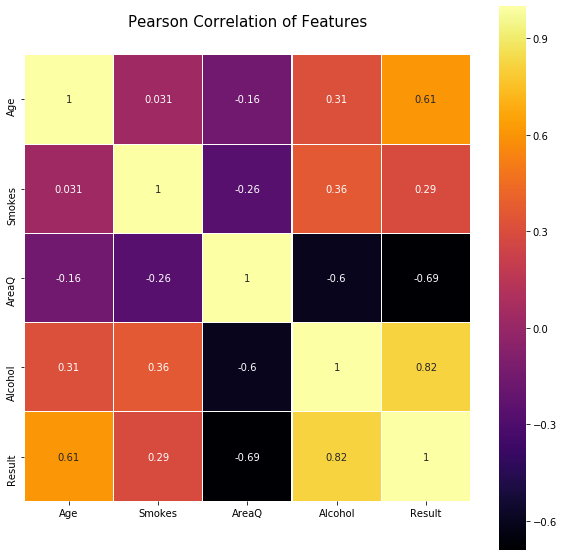

In [12]:
colormap = plt.cm.inferno
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#### Let's split our data into a training and testing set to calculate the model accuracy using the _Decison Tree Classifier_

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

In [14]:
X = data.iloc[:,0 : 4] #Features (Age, Smokes, AreaQ, Alcohol)
y = data.iloc[: , 4] #Label (Result)

In [15]:
#The traning size is 70% and the test size is 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100)

Accuracy: 94.44444444444444


#### We can see that the accuracy of the model is 94% which is good enough to predict the result of the new inputs. We can improve the model further more by trying different algorithms and further cleansing the data.